PERRET / MORI / DUPONT / POTIRON
# Projet Bayes: 

In [2]:
#Bibliothèques
import numpy as np
import numpy.random as rnd
import scipy as sp
import matplotlib.pyplot as plt

In [3]:
#Import des données
N = 12
T = np.array([11, 11, 17, 22, 9, 6, 5, 14, 9, 7, 22, 51])
X = np.array([6, 9, 17, 22, 7, 5, 5, 14, 9, 7, 9, 51])
Y = np.array([5, 2, 0, 0, 2, 1, 0, 0, 0, 0, 13, 0])

In [4]:
#Fonctions utiles
Sigmoid = lambda x: 1/(1+np.exp(-x))

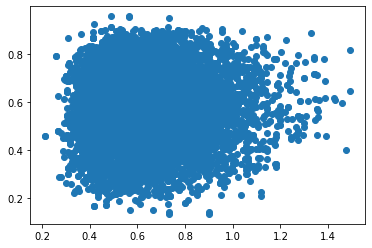

In [5]:
n = 11000
dim_param = 2
t_chauffe = 1001

#Lois à prioris
prior_alpha_sd = 1e4
prior_delta_sd = 1e4

#Marches aléatoires
alpha_MH_sd = 0.4
delta_MH_sd = 1.2

#On sépare les données en y=0/y<>0
X_0 = X[Y == 0]
X_1 = X[Y != 0]
Y_0 = Y[Y == 0]
Y_1 = Y[Y != 0]
T_0 = T[Y == 0]
T_1 = T[Y != 0]

#Création de theta = [alpha, delta]
param_0 = [0.0 for k in range(dim_param)]
param = np.array([param_0]*(n+1))

#Mise en route
for t in range(1,n+1):
    param[t] = param[t-1]
    
    #Propositions 
    Alpha = param[t][0]
    Alpha_star = rnd.normal(loc=Alpha, scale=alpha_MH_sd)
    Delta = param[t][1]
    Delta_star = rnd.normal(loc=Delta, scale=1.2)
    
    #Remise à l'échelle
    P = Sigmoid(Alpha)
    P_star = Sigmoid(Alpha_star)
    Theta = Sigmoid(Delta)
    Theta_star = Sigmoid(Delta_star)
    
    #Alpha
    top = (np.log(Theta + (1-Theta)*(1-P_star)**T_0)).sum() + (Y_1*np.log(P_star)+X_1*np.log(1-P_star)).sum() - Alpha_star**2/(2*prior_alpha_sd)
    bottom = (np.log(Theta + (1-Theta)*(1-P)**T_0)).sum() + (Y_1*np.log(P)+X_1*np.log(1-P)).sum() - Alpha**2/(2*prior_alpha_sd)
    proba_accep = min(1,np.exp(top-bottom))
    U = rnd.uniform(low=0,high=1)
    if U<proba_accep:
        param[t][0] = Alpha_star
        
    #Delta
    top = (np.log(Theta_star + (1-Theta_star)*(1-P)**T_0)).sum() + len(X_1)*np.log(1-Theta_star) - Delta_star**2/(2*prior_delta_sd)
    bottom = (np.log(Theta + (1-Theta)*(1-P)**T_0)).sum() + len(X_1)*np.log(1-Theta) - Delta**2/(2*prior_delta_sd)
    proba_accep = min(1,np.exp(top-bottom))
    U = rnd.uniform(low=0,high=1)
    if U<proba_accep:
        param[t][1] = Delta_star
    
plt.scatter(np.exp(param[:,0]),Sigmoid(param[:,1]))

In [30]:

#Une fois Alpha et Delta créés, on les transforme pour obtenir Beta et Theta/P
Alpha = param[t_chauffe:,0]
Delta = param[t_chauffe:,1]
Beta = np.exp(param[t_chauffe:,0])
Theta = Sigmoid(param[t_chauffe:,1])
P = Sigmoid(param[t_chauffe:,0])

import pandas as pd
#On met en forme les résultats
titres_col = ['Moyenne', 'Ecart Type', 'Quantile 2.5%', 'Mediane', 'Quantile 97.5%']
titres_lig = ['Alpha', 'Beta', 'Delta', 'Theta', 'P']
Moyennes = [Alpha.mean(), Beta.mean(), Delta.mean(), Theta.mean(), P.mean()]
Ecarts = [Alpha.std(), Beta.std(), Delta.std(), Theta.std(), P.std()]
Quantile_1 = [np.quantile(Alpha,0.025), np.quantile(Beta,0.025), np.quantile(Delta,0.025), np.quantile(Theta,0.025), np.quantile(P,0.025)]
Mediane = [np.median(Alpha), np.median(Beta), np.median(Delta), np.median(Theta), np.median(P)]
Quantile_2 = [np.quantile(Alpha,0.975), np.quantile(Beta,0.975), np.quantile(Delta,0.975), np.quantile(Theta,0.975), np.quantile(P,0.975)]
Matrice_val = [Moyennes, Ecarts, Quantile_1, Mediane, Quantile_2]

Results = pd.DataFrame(Matrice_val, titres_col, titres_lig)
print(f'Résultats obtenus avec un temps de chauffe de {t_chauffe}, et une chaîne restante de {n} éléments.\n')
print(Results)

#A comparer avec les resultats donnés dans le sujet
titres_lig_2 = ['Alpha', 'Beta', 'Delta', 'Theta']
Matrice_val = [[-0.4809, 0.6427, 0.3144, 0.5717], 
              [0.2795, 0.1812, 0.6177, 0.1391],
              [-1.044, 0.3521, -0.8919, 0.2907], 
              [-0.4767, 0.6208, 0.3124, 0.5775], 
              [0.0652, 1.067, 1.553, 0.8253]]

Results_2 = pd.DataFrame(Matrice_val, titres_col, titres_lig_2)
print(f'\n \n Résultats donnés dans l\'énoncé.\n')
print(Results_2)

Résultats obtenus avec un temps de chauffe de 1001, et une chaîne restante de 11000 éléments.

                   Alpha      Beta     Delta     Theta         P
Moyenne        -0.472340  0.646763  0.320809  0.572809  0.386005
Ecart Type      0.270475  0.177654  0.633011  0.142560  0.063155
Quantile 2.5%  -0.986240  0.372977 -0.923297  0.284287  0.271655
Mediane        -0.472174  0.623645  0.318864  0.579047  0.384102
Quantile 97.5%  0.058630  1.060382  1.571022  0.827929  0.514653

 
 Résultats donnés dans l'énoncé.

                 Alpha    Beta   Delta   Theta
Moyenne        -0.4809  0.6427  0.3144  0.5717
Ecart Type      0.2795  0.1812  0.6177  0.1391
Quantile 2.5%  -1.0440  0.3521 -0.8919  0.2907
Mediane        -0.4767  0.6208  0.3124  0.5775
Quantile 97.5%  0.0652  1.0670  1.5530  0.8253


In [ ]:
plt.plot(Alpha)

In [ ]:
plt.plot(Delta)